In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi, sqrt
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere


In [2]:
def ExecutePlot(job, backend = 'statevector'):
    blochSphere = ""
    phasePlot = ""
    
    simulator = Aer.get_backend(backend+'_simulator')
    
    result = simulator.run(job, shots = 1024).result() # Do the simulation and return the result
    
    if backend != "qasm":
        out_state = result.get_statevector()
        print("StateVector: ",out_state) # Display the output state vector
        blochSphere = plot_bloch_multivector(out_state)
        phasePlot = plot_state_qsphere(out_state)
        
    
    counts = result.get_counts()
    print("Counts     : ",counts)
    histogram = plot_histogram(counts)
    return histogram, blochSphere, phasePlot

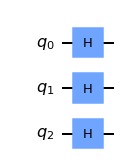

In [3]:
circuit = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    circuit.h(qubit)

job = assemble(circuit)
    
# See the circuit:
circuit.draw('mpl')

StateVector:  [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]
Counts     :  {'000': 0.125, '001': 0.125, '010': 0.125, '011': 0.125, '100': 0.125, '101': 0.125, '110': 0.125, '111': 0.125}


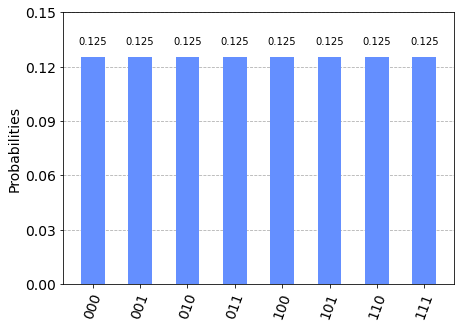

In [4]:
# Let's see the result
histogram, _, _ = ExecutePlot(job)
histogram

# Quantum Entanglement

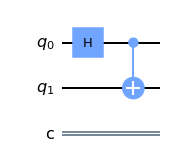

In [5]:
circuit = QuantumCircuit(2,1)
# Apply H-gate to the first:
circuit.h(0)
circuit.cx(0,1)
job = assemble(circuit)

circuit.draw('mpl')

StateVector:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Counts     :  {'0': 1}


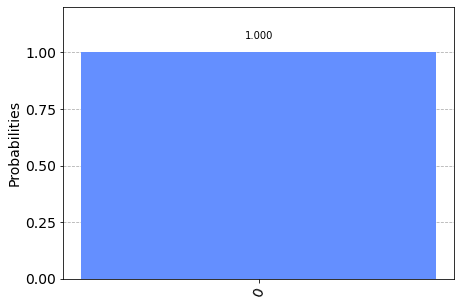

In [6]:
histogram, blochSphere, phasePlot = ExecutePlot(job)
histogram

Bloch-Spheres cannot be plotted for two entangled qubits.

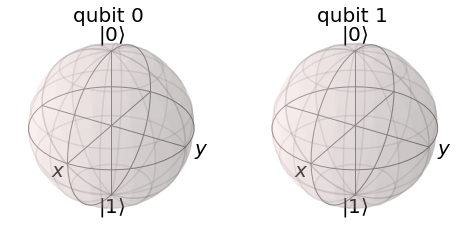

In [7]:
blochSphere

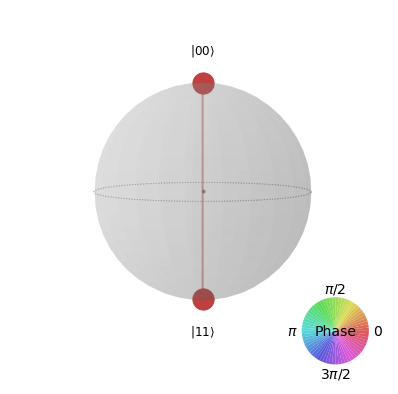

In [8]:
phasePlot

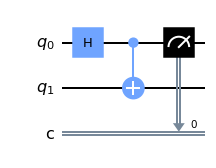

In [9]:
circuit.measure(0,0)
job = assemble(circuit)

circuit.draw('mpl')

However, Measuring either collapses both the qubits and both yield the same output.

Bloch Spheres Can now bw plotted for both Qubits

**NOTE:**

Use Qasm_Simulator to visualise The Probabilities of the end state.

Statevector_Simulator somehow does not plot the probabilities. It just plots the final state of one run

StateVector:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Counts     :  {'0': 1}


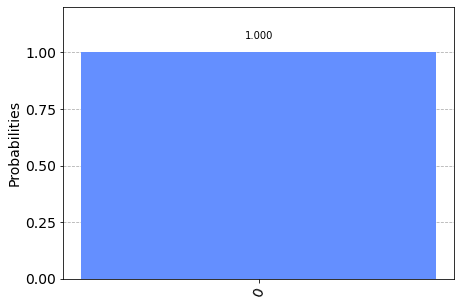

In [10]:
histogram, blochSphere, phasePlot = ExecutePlot(job)#,"qasm")
histogram

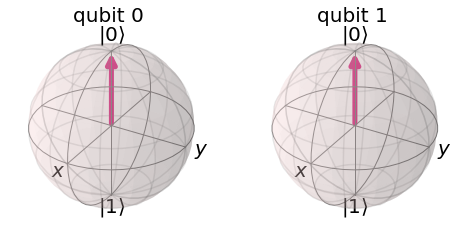

In [11]:
blochSphere

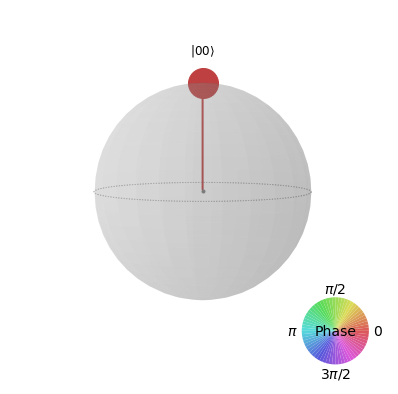

In [12]:
phasePlot

Being _**Entangled**_ means that measuring one will instantly collapse the other.

It **DOES NOT** mean they will always have the same state


**NOTE:**
It is advisable to look at the possible states using the phase plot and not blochSphere

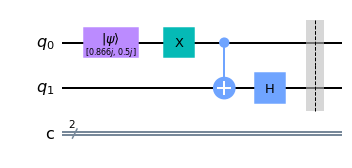

In [13]:
circuit = QuantumCircuit(2,2)
# Superimpose First Qubit
# circuit.h(0)
circuit.initialize([1j*sqrt(3)/2, 1j/2],0)
circuit.x(0)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()
# circuit.cx(1,0)
job = assemble(circuit)

circuit.draw('mpl')

StateVector:  [ 0.00000000e+00+0.35355339j  7.49939943e-17+0.61237244j
  0.00000000e+00+0.35355339j -7.49939943e-17-0.61237244j]
Counts     :  {'00': 1}


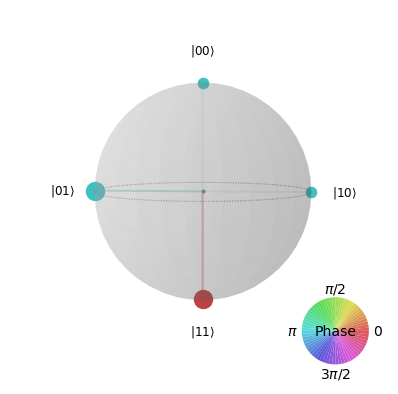

In [14]:
histogram, blochSphere, phasePlot = ExecutePlot(job)
phasePlot

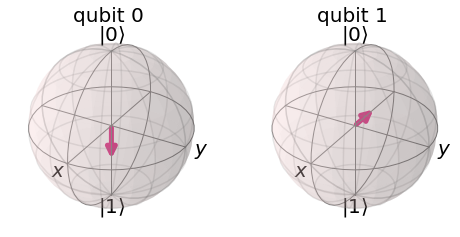

In [15]:
blochSphere

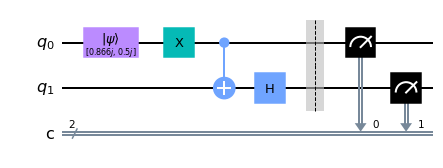

In [16]:
circuit.measure(0,0)
circuit.measure(1,1)
job = assemble(circuit)
circuit.draw('mpl')

Counts     :  {'00': 108, '01': 418, '10': 131, '11': 367}


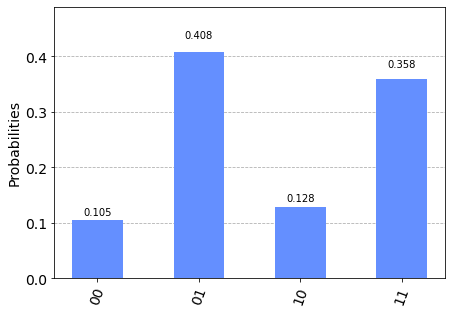

In [17]:
histogram, blochSphere, _ = ExecutePlot(job,"qasm")
histogram